****
### Full name : Tran Hai Nam
### ID : 11219279
### Class DSEB63

****
 Use "Housing dataset":
 - Calculate Silhouette scores for different number of clusters and choose the most suitable cluster.
- Run the GMM clustering algo. After that you should have cluster for all data samples.
- Use t-SNE to reduce dimension of the original dataset (assigned cluster not included) to 2D.
- Visualize the 2D data with cluster.
Compare k-means and GMM (pros and cons).
Find 3 examples that GMM is better than k-means.

[OPTIONAL] (Question 1 - extended) You firstly scale all features to only one range (example: [0,1]) and do the same jobs as question 1. Give comments on the difference between non-scaled and scaled version. 

****

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data  = pd.read_csv(r"../Gaussian-Mixture-Model/housing.csv")

# Original Dataset

In [3]:
X = data.iloc[:, :]
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


**Find Optimal Cluster Number**

Best Num Cluster is 2


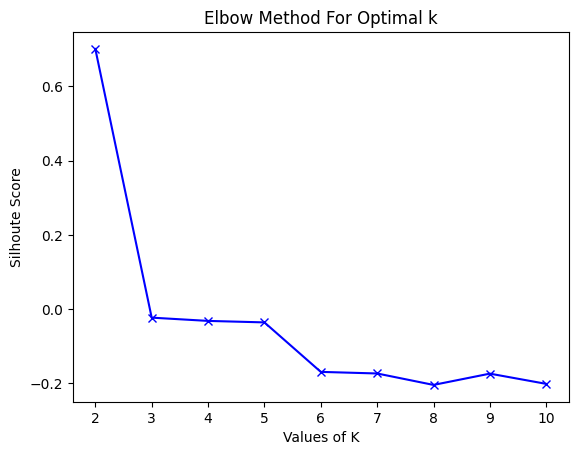

In [4]:
# Import necessary libraries
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture
from sklearn.manifold import TSNE

# Calculate Silhouette scores for different numbers of clusters
silhouette_scores = []
n_clusters_range = range(2,11)
for n_clusters in n_clusters_range:
    gmm = GaussianMixture(n_components=n_clusters, random_state=42)
    kmeans_labels_clusters = gmm.fit_predict(X)
    silhouette_avg = silhouette_score(X, kmeans_labels_clusters)
    silhouette_scores.append(silhouette_avg)

best_n_clusters = np.argmax(silhouette_scores) + 2
print(f'Best Num Cluster is {best_n_clusters}')
plt.plot(n_clusters_range, silhouette_scores, 'bx-')
plt.xlabel("Values of K")
plt.ylabel('Silhoute Score')
plt.title("Elbow Method For Optimal k")
plt.show()

**Gaussian Mixture Model with optimal clusters**

In [5]:
from sklearn.cluster import KMeans
gmm = GaussianMixture(n_components=best_n_clusters, random_state=42)
gmm_labels_clusters = gmm.fit_predict(X)

kmeans = KMeans(n_clusters=best_n_clusters, random_state=42)
kmeans_labels_clusters = kmeans.fit_predict(X)

# Use tSNE to reduce dimension of the original dataset to 2D
tsne = TSNE(n_components= 2, random_state= 42)
X_reduced_2D = tsne.fit_transform(X)

X_reduced_2D.shape

C:\Users\Hải Nam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


(20640, 2)

**Visualize 2D data with cluster on both GMM and KMeans**

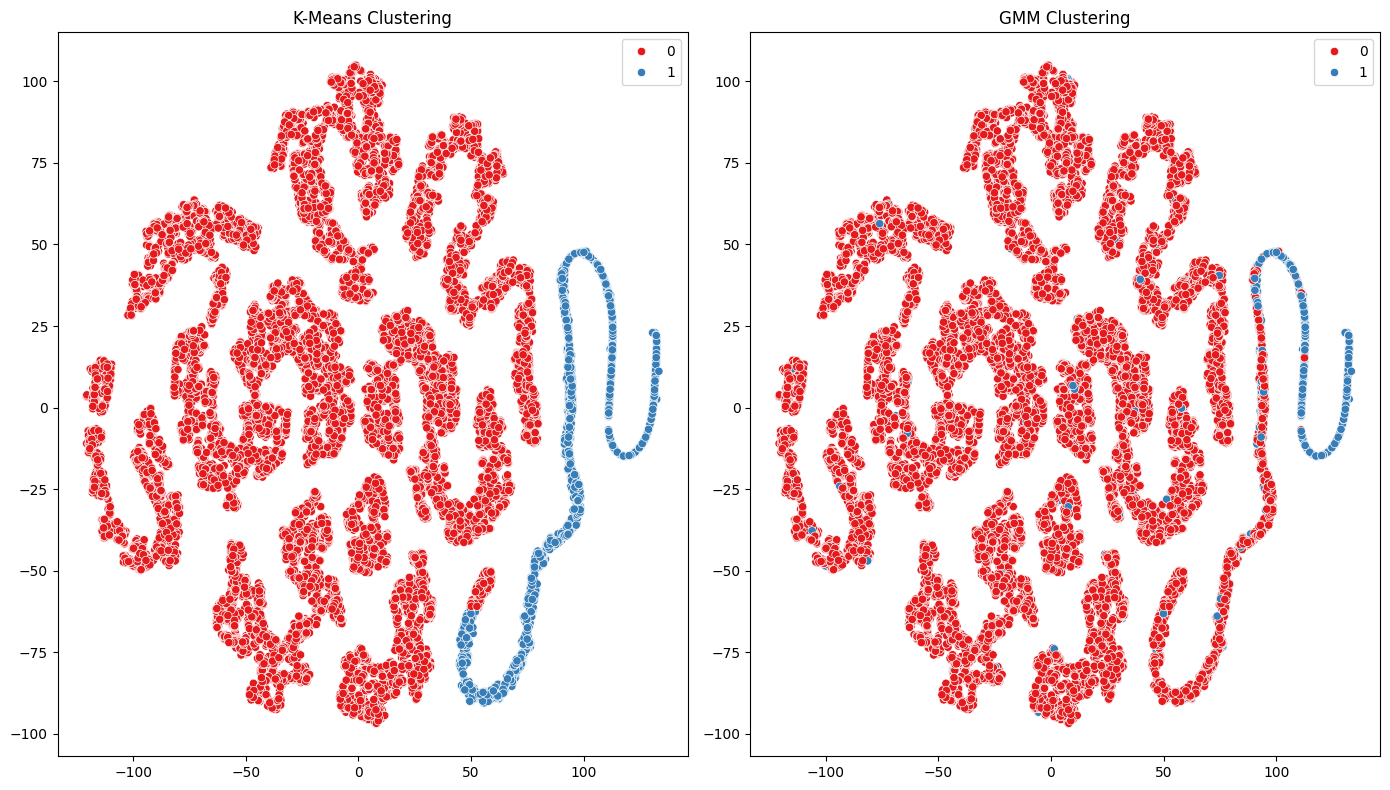

In [6]:
# Visualize the 2D data with clusters for both k-means and GMM
plt.figure(figsize=(14, 8))

# GMM
plt.subplot(1, 2, 2)
sns.scatterplot(x=X_reduced_2D[:, 0], y=X_reduced_2D[:, 1],
                hue=gmm_labels_clusters, palette='Set1', legend='full')
plt.title('GMM Clustering')

# K-Means
plt.subplot(1, 2, 1)
sns.scatterplot(x=X_reduced_2D[:, 0], y=X_reduced_2D[:, 1],
                hue=kmeans_labels_clusters, palette='Set1', legend='full')
plt.title('K-Means Clustering')

plt.tight_layout()
plt.show()

**Compare with K-Means**

| **k-Means** | **Gaussian Mixture Model (GMM)** |
|---|---|
| **Pros** | **Pros** |
| Simple and easy to implement. | More flexible in terms of cluster covariance, accommodating different shapes and sizes of clusters. |
| Computationally efficient, especially for large datasets. | Can model complex data distributions. |
| Works well when clusters are well-separated and spherical. | Soft clustering capability, assigning probabilities of data points belonging to each cluster. |
| **Cons** | **Cons** |
| Assumes clusters to be spherical, which may not be the case in the real-world data. | Computationally more expensive than k-means, especially for large datasets. |
| Sensitive to initial cluster centers, leading to convergence to local optima. | Requires careful initialization and may converge to local optima. |
| Doesn't work well with non-linear data or clusters of different sizes and densities. | Interpretability might be challenging due to soft clustering nature. |


**Examples where GMM might be better than k-means:**

- Clusters with varying sizes and shapes: GMM can handle clusters with different shapes and sizes well, while k-means assumes spherical clusters of equal variance.

- Overlapping clusters: If clusters in the data overlap significantly, GMM can provide a probabilistic assignment of points to clusters, capturing the uncertainty, while k-means assigns each point to the nearest cluster, potentially misrepresenting the data.

- Data with noise: GMM is less sensitive to noise and outliers compared to k-means, as it models the underlying distribution of the data rather than relying solely on distance-based assignments.

# Scaler Dataset

C:\Users\Hải Nam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Hải Nam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Hải Nam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.

Best Num Cluster is 2


C:\Users\Hải Nam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Text(0.5, 1.0, 'GMM Clustering')

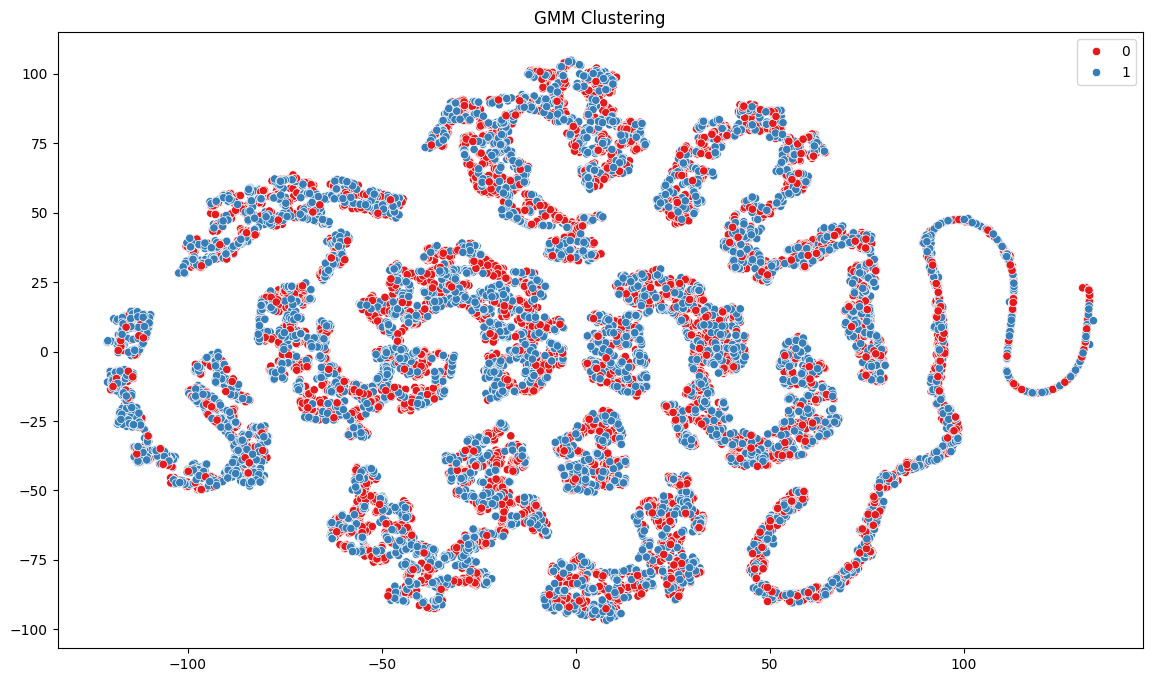

In [10]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler((0,1))
X_scale = scaler.fit_transform(X)

# Calculate Silhouette scores for different numbers of clusters
silhouette_scores = []
n_clusters_range = range(2, 11)
for n_clusters in n_clusters_range:
    km = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans_labels_clusters = km.fit_predict(X)
    silhouette_avg = silhouette_score(X_scale, kmeans_labels_clusters)
    silhouette_scores.append(silhouette_avg)

best_n_clusters = np.argmax(silhouette_scores) + 2
print(f'Best Num Cluster is {best_n_clusters}')

gmm = GaussianMixture(n_components=best_n_clusters, random_state=42)
gmm_labels_clusters = gmm.fit_predict(X_scale)

kmeans = KMeans(n_clusters=best_n_clusters, random_state=42)
kmeans_labels_clusters = kmeans.fit_predict(X_scale)

# Use tSNE to reduce dimension of the original dataset to 2D
tsne = TSNE(n_components=2, random_state=42)
X_scale_2D = tsne.fit_transform(X)

# Visualize the 2D data with clusters for both k-means and GMM
plt.figure(figsize=(14, 8))

# GMM
sns.scatterplot(x=X_scale_2D[:, 0], y=X_scale_2D[:, 1],
                hue=gmm_labels_clusters, palette='Set1', legend='full')
plt.title('GMM Clustering')


**Observation**:
- Scaling ensures features contribute equally to distance calculations, leading to fairer cluster formation.
- Scaling minimizes the impact of outliers on feature ranges, preventing them from unduly influencing clusters.